<a href="https://colab.research.google.com/github/chetankhairnar05/Colab/blob/main/cattle_final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the timm library for the model architecture
!pip install -q timm

# --- Kaggle API Setup ---
!pip install -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files

print("Please upload your kaggle.json file:")
uploaded = files.upload()

!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("\n✅ Kaggle API is ready.")

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json

✅ Kaggle API is ready.


In [2]:
# --- Download the model from the correct URL ---
# Username: harooniqbal89
# Notebook Slug: indian-bovine-breeds-classification
print("\nDownloading the pre-trained model...")
!kaggle kernels output harooniqbal89/indian-bovine-breeds-classification -p /content/

print("\n✅ Model 'best_model_final.pth' has been downloaded!")


Output file downloaded to /content/best_model_final.pth
Output file downloaded to /content/best_model_warmup.pth
Output file downloaded to /content/training_results.json
Kernel log downloaded to /content/indian-bovine-breeds-classification.log 

✅ Model 'best_model_final.pth' has been downloaded!


✅ Your 41-breed model is loaded and ready.

Please upload an image to classify:


Saving sddefault_jpg.rf.9e78aa45206566186cdb39dd099d5b2a.jpg to sddefault_jpg.rf.9e78aa45206566186cdb39dd099d5b2a.jpg


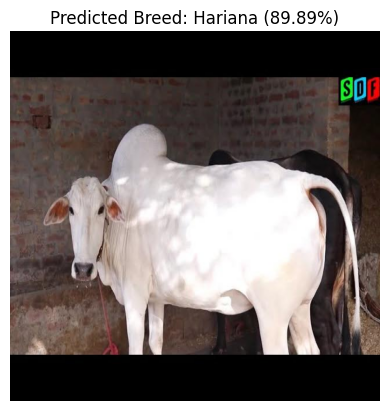

In [8]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import io
import os
import timm

# --- 1. PREPARE THE MODEL FOR PREDICTION ---
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# The list of 41 breeds from your training code
CLASS_NAMES = [
    'Alambadi', 'Amritmahal', 'Ayrshire', 'Banni', 'Bargur', 'Bhadawari',
    'Brown_Swiss', 'Dangi', 'Deoni', 'Gir', 'Guernsey', 'Hallikar', 'Hariana',
    'Holstein_Friesian', 'Jaffrabadi', 'Jersey', 'Kangayam', 'Kankrej',
    'Kasargod', 'Kenkatha', 'Kherigarh', 'Khillari', 'Krishna_Valley',
    'Malnad_gidda', 'Mehsana', 'Murrah', 'Nagori', 'Nagpuri', 'Nili_Ravi',
    'Nimari', 'Ongole', 'Pulikulam', 'Rathi', 'Red_Dane', 'Red_Sindhi',
    'Sahiwal', 'Surti', 'Tharparkar', 'Toda', 'Umblachery', 'Vechur'
]
NUM_CLASSES = len(CLASS_NAMES)

# Re-create the model structure from your code
model = timm.create_model(
    'convnext_tiny',
    pretrained=False,
    num_classes=NUM_CLASSES,
    drop_path_rate=0.2
).to(DEVICE)

# --- 2. LOAD YOUR TRAINED WEIGHTS ---
model_path = '/content/best_model_final.pth'

if os.path.exists(model_path):
    # --- THIS IS THE FIX ---
    # 1. First, load the entire checkpoint dictionary
    checkpoint = torch.load(model_path, map_location=DEVICE)
    # 2. Then, load the model's state_dict from within that dictionary
    model.load_state_dict(checkpoint['model_state_dict'])

    model.eval() # Set model to evaluation mode
    print("✅ Your 41-breed model is loaded and ready.")

    # --- 3. UPLOAD YOUR IMAGE AND PREDICT ---
    # (The rest of the code is the same)
    inference_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    print("\nPlease upload an image to classify:")
    uploaded_image = files.upload()

    if uploaded_image:
        file_name = next(iter(uploaded_image))
        img = Image.open(io.BytesIO(uploaded_image[file_name])).convert("RGB")
        img_tensor = inference_transforms(img).unsqueeze(0).to(DEVICE)

        with torch.no_grad():
            logits = model(img_tensor)
            probabilities = torch.nn.functional.softmax(logits, dim=1)
            top_prob, top_idx = torch.topk(probabilities, 1)

        breed_name = CLASS_NAMES[top_idx.item()]
        confidence = top_prob.item() * 100

        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Predicted Breed: {breed_name} ({confidence:.2f}%)")
        plt.show()
else:
    print("\n❌ ERROR: 'best_model_final.pth' not found.")

✅ Your 41-breed model is loaded and ready.

Please upload an image to classify:


Saving 2_Surti_jpg.rf.8b62d133f17074f41de38b4340cb77ac.jpg to 2_Surti_jpg.rf.8b62d133f17074f41de38b4340cb77ac.jpg


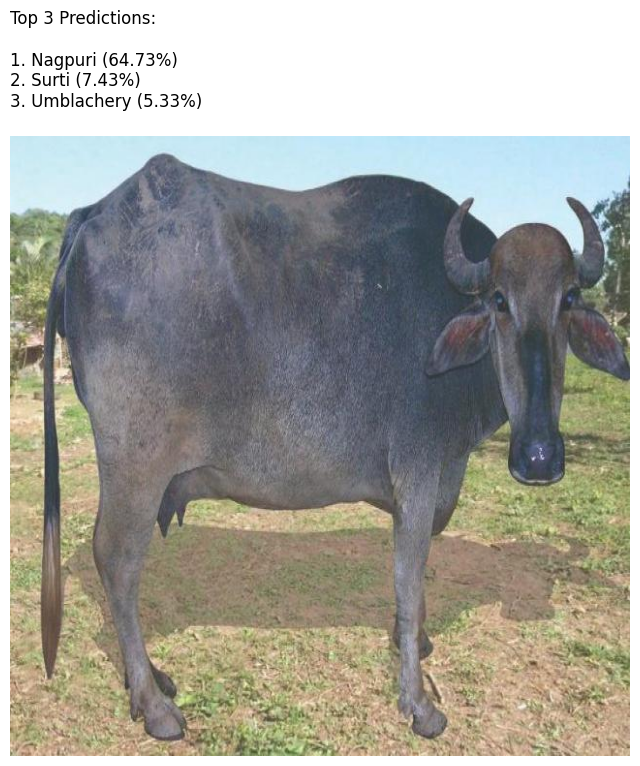

In [3]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import io
import os
import timm

# --- 1. PREPARE THE MODEL FOR PREDICTION ---
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# The correct list of 41 breeds from your training code
CLASS_NAMES = [
    'Alambadi', 'Amritmahal', 'Ayrshire', 'Banni', 'Bargur', 'Bhadawari',
    'Brown_Swiss', 'Dangi', 'Deoni', 'Gir', 'Guernsey', 'Hallikar', 'Hariana',
    'Holstein_Friesian', 'Jaffrabadi', 'Jersey', 'Kangayam', 'Kankrej',
    'Kasargod', 'Kenkatha', 'Kherigarh', 'Khillari', 'Krishna_Valley',
    'Malnad_gidda', 'Mehsana', 'Murrah', 'Nagori', 'Nagpuri', 'Nili_Ravi',
    'Nimari', 'Ongole', 'Pulikulam', 'Rathi', 'Red_Dane', 'Red_Sindhi',
    'Sahiwal', 'Surti', 'Tharparkar', 'Toda', 'Umblachery', 'Vechur'
]
NUM_CLASSES = len(CLASS_NAMES)

# Re-create the model structure from your code
model = timm.create_model(
    'convnext_tiny',
    pretrained=False,
    num_classes=NUM_CLASSES,
    drop_path_rate=0.2
).to(DEVICE)

# --- 2. LOAD YOUR TRAINED WEIGHTS ---
model_path = '/content/best_model_final.pth'

if os.path.exists(model_path):
    checkpoint = torch.load(model_path, map_location=DEVICE)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    print("✅ Your 41-breed model is loaded and ready.")

    # Define Image Transforms
    inference_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    # --- 3. UPLOAD YOUR IMAGE AND PREDICT ---
    print("\nPlease upload an image to classify:")
    uploaded_image = files.upload()

    if uploaded_image:
        file_name = next(iter(uploaded_image))
        img = Image.open(io.BytesIO(uploaded_image[file_name])).convert("RGB")
        img_tensor = inference_transforms(img).unsqueeze(0).to(DEVICE)

        with torch.no_grad():
            logits = model(img_tensor)
            # Convert logits to probabilities
            probabilities = torch.nn.functional.softmax(logits, dim=1)

            # --- MODIFIED PART: Get Top 3 Predictions ---
            top3_probs, top3_indices = torch.topk(probabilities, 3, dim=1)

            # Convert tensors to lists for easier handling
            top3_probs_list = top3_probs.squeeze().tolist()
            top3_indices_list = top3_indices.squeeze().tolist()

        # --- MODIFIED PART: Display the Top 3 Results ---
        plt.figure(figsize=(8, 10))
        plt.imshow(img)
        plt.axis('off')

        # Create a formatted string for the title
        title_text = "Top 3 Predictions:\n\n"
        for i in range(3):
            breed_name = CLASS_NAMES[top3_indices_list[i]]
            confidence = top3_probs_list[i] * 100
            title_text += f"{i+1}. {breed_name} ({confidence:.2f}%)\n"

        plt.title(title_text, loc='left')
        plt.show()

else:
    print("\n❌ ERROR: 'best_model_final.pth' not found. Please make sure the file is in your Colab session.")

In [4]:
import os
import shutil
from google.colab import drive

# --- 1. Mount your Google Drive ---
# This will prompt you for authorization.
print("Mounting Google Drive...")
drive.mount('/content/drive')
print("✅ Drive mounted successfully!")

# --- 2. Define the folder and file paths ---
# Set the name for your new folder in Google Drive
drive_folder_path = '/content/drive/MyDrive/cattleFinal1'

# List the important files you want to save from your Colab session
files_to_save = [
    'best_model_final.pth',
    'best_model_warmup.pth',
    'training_results.json'
]

# --- 3. Create the folder in your Drive ---
# The 'exist_ok=True' prevents an error if the folder already exists
print(f"\nCreating folder: {drive_folder_path}")
os.makedirs(drive_folder_path, exist_ok=True)
print("✅ Folder created (or already exists).")

# --- 4. Copy the files into the Drive folder ---
print("\nCopying files to Drive...")
for file_name in files_to_save:
    # Source path in the current Colab session
    source_path = f'/content/{file_name}'
    # Destination path in your new Drive folder
    destination_path = os.path.join(drive_folder_path, file_name)

    # Check if the file exists in Colab before copying
    if os.path.exists(source_path):
        shutil.copy(source_path, destination_path)
        print(f"  -> Copied '{file_name}'")
    else:
        print(f"  -> ⚠️ WARNING: File '{file_name}' not found in Colab session.")

print("\n🎉 Process complete! Your files are saved in the 'cattleFinal1' folder in your Google Drive.")

Mounting Google Drive...
Mounted at /content/drive
✅ Drive mounted successfully!

Creating folder: /content/drive/MyDrive/cattleFinal1
✅ Folder created (or already exists).

Copying files to Drive...
  -> Copied 'best_model_final.pth'
  -> Copied 'best_model_warmup.pth'
  -> Copied 'training_results.json'

🎉 Process complete! Your files are saved in the 'cattleFinal1' folder in your Google Drive.
